In [ ]:
#import all useful libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# read csv file
df=pd.read_csv("Nf.csv")
df.head(2)
df.shape

(8807, 12)

In [ ]:
#Fill all the NUll values with columns name
df["cast"].fillna("unknown actor",inplace=True)
df["show_id"].fillna("unknown show_id",inplace=True)
df["type"].fillna("unknown type",inplace=True)
df["title"].fillna("unknown title",inplace=True)
df["director"].fillna("unknown director",inplace=True)
df["country"].fillna("unknown country",inplace=True)
df["date_added"].fillna(0,inplace=True)
df["release_year"].fillna(0,inplace=True)
df["rating"].fillna(0,inplace=True)
df["duration"].fillna(0,inplace=True)
df["listed_in"].fillna("unknown genre",inplace=True)
df["description"].fillna("unknown description",inplace=True)



In [ ]:
df.shape

(8807, 12)

# **Un-nesting the columns **


In [ ]:
#Un-nesting the columns by each column
genre_list=df['listed_in'].apply(lambda x: str(x).split(", ")).tolist()# split the genre column
genre=pd.DataFrame(genre_list,index=df["title"]) # convert the genre list into a new dataframe
genre=genre.stack() # reshape the dataframe by pivoting the columns into rows
genre=pd.DataFrame(genre.reset_index())
genre=genre.rename(columns={0:"genre"})#rename the genre column
genre=genre.drop('level_1',axis=1)
genre.shape

(19323, 2)

In [ ]:
cast_list=df['cast'].apply(lambda x: str(x).split(", ")).tolist()# split the genre column
cast=pd.DataFrame(cast_list,index=df["title"]) # convert the genre list into a new dataframe
cast=cast.stack() # reshape the dataframe by pivoting the columns into rows
cast=pd.DataFrame(cast.reset_index())
cast=cast.rename(columns={0:"cast"})#rename the genre column
cast=cast.drop('level_1',axis=1)
cast.shape

(64951, 2)

In [ ]:
director_list=df['director'].apply(lambda x: str(x).split(", ")).tolist()# split the genre column
director=pd.DataFrame(director_list,index=df["title"]) # convert the genre list into a new dataframe
director=director.stack() # reshape the dataframe by pivoting the columns into rows
director=pd.DataFrame(director.reset_index())
director=director.rename(columns={0:"director"})#rename the genre column
director=director.drop('level_1',axis=1)
director.shape

(9612, 2)

In [ ]:
country_list=df['country'].apply(lambda x: str(x).split(", ")).tolist()# split the genre column
country=pd.DataFrame(country_list,index=df["title"]) # convert the genre list into a new dataframe
country=country.stack() # reshape the dataframe by pivoting the columns into rows
country=pd.DataFrame(country.reset_index())
country=country.rename(columns={0:"country"})#rename the genre column
country=country.drop('level_1',axis=1)
country.shape

(10845, 2)

In [ ]:
#merge the columns into dataframe
df1=country.merge(cast,on=['title'],how='inner')
df2=df1.merge(director,on=['title'],how='inner')
df3=df2.merge(genre,on=['title'],how='inner')
df3.head()


,title,country,cast,director,genre
0,Dick Johnson Is Dead,United States,unknown actor,Kirsten Johnson,Documentaries
1,Blood & Water,South Africa,Ama Qamata,unknown director,International TV Shows
2,Blood & Water,South Africa,Ama Qamata,unknown director,TV Dramas
3,Blood & Water,South Africa,Ama Qamata,unknown director,TV Mysteries
4,Blood & Water,South Africa,Khosi Ngema,unknown director,International TV Shows


In [ ]:
#merge un-nested columns into main dataframe
df4=df3.merge(df[["show_id","type","title","date_added","release_year","rating","duration","description"]],on=["title"])
df4.head()

,title,country,cast,director,genre,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,United States,unknown actor,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,South Africa,Ama Qamata,unknown director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,South Africa,Ama Qamata,unknown director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,South Africa,Ama Qamata,unknown director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,South Africa,Khosi Ngema,unknown director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


**1. Find the counts of each categorical variable both using graphical and non-graphical analysis.**

**a. For Non-graphical Analysis:**

In [ ]:
df['title'].value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

In [ ]:
country=df4.groupby(by="country")["title"].nunique().sort_values(ascending=False)
country.reset_index()

,country,title
0,United States,3689
1,India,1046
2,unknown country,831
3,United Kingdom,804
4,Canada,445
...,...,...
123,Mongolia,1
124,Somalia,1
125,Ethiopia,1
126,Botswana,1


In [ ]:
df4.groupby("cast")["title"].nunique().sort_values(ascending=False)

cast
unknown actor       825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
                   ... 
Jamie Lee             1
Jamie Kenna           1
Jamie Kaler           1
Jamie Johnston        1
Ṣọpẹ́ Dìrísù          1
Name: title, Length: 36440, dtype: int64

In [ ]:
df4.groupby("type")["title"].nunique().sort_values(ascending=False)


type
Movie      6131
TV Show    2676
Name: title, dtype: int64

In [ ]:
df4.groupby("director")["title"].nunique().sort_values(ascending=False)

director
unknown director           2634
Rajiv Chilaka                22
Jan Suter                    21
Raúl Campos                  19
Suhas Kadav                  16
                           ... 
Brandon Camp                  1
Juan Antin                    1
Juan Antonio de la Riva       1
Juan Camilo Pinzon            1
María Jose Cuevas             1
Name: title, Length: 4994, dtype: int64

In [ ]:
df4.groupby("release_year")["title"].nunique().sort_values(ascending=False)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Name: title, Length: 74, dtype: int64

In [ ]:
df4.groupby("date_added")["title"].nunique().sort_values(ascending=False)

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
March 29, 2018         1
August 3, 2020         1
March 29, 2021         1
March 3, 2017          1
July 29, 2018          1
Name: title, Length: 1768, dtype: int64

In [ ]:
df4.groupby("duration")["title"].nunique().sort_values(ascending=False)

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
201 min         1
200 min         1
194 min         1
191 min         1
196 min         1
Name: title, Length: 221, dtype: int64

In [ ]:
df4.groupby("genre")["title"].nunique().sort_values(ascending=False)

genre
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                 

In [ ]:
df4.groupby("description")["title"].nunique().sort_values(ascending=False)

description
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
The Great Dog Demon beaqueathed one of the Three Swords of the Fang to each of his two sons. Now the evil power of the third sword has been awakened.        2
                                                                                                                                                            ..
Captain Atomic – once a superhero,

**b. For graphical analysis:**

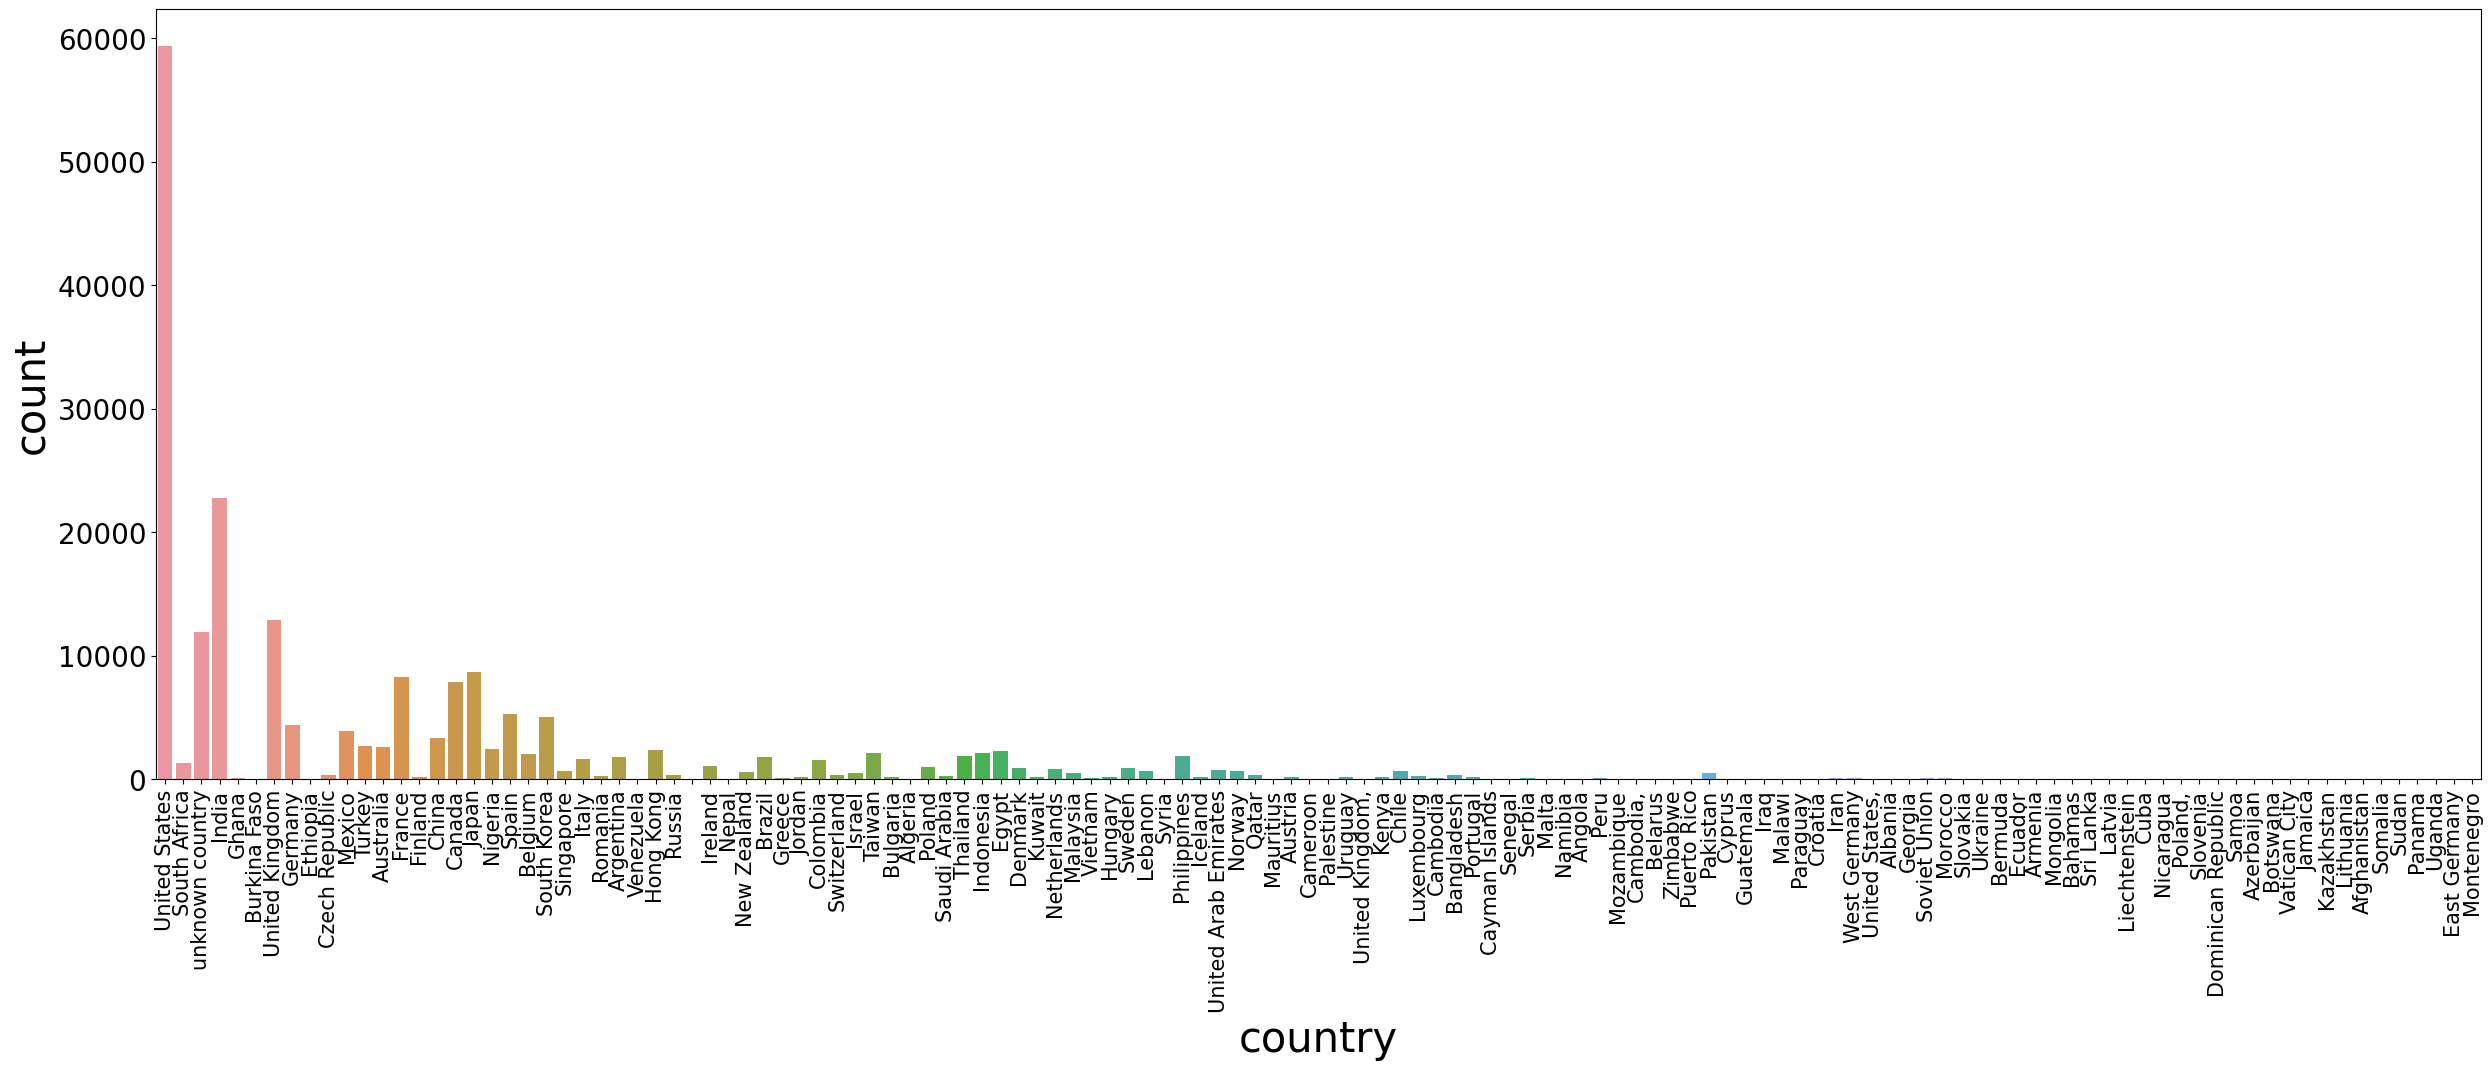

In [ ]:
#represent the country count on graph
plt.figure(figsize=(30,10))
sns.countplot(data=df4,x='country')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=20)
#plt.tick_params(labelsize=15)
plt.xlabel("country",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.show()

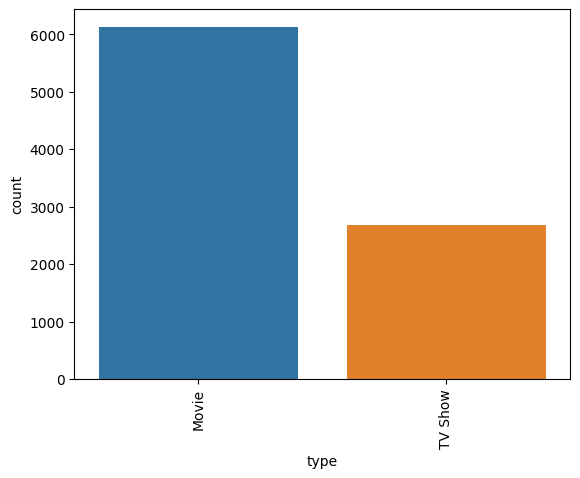

In [ ]:
#represent the  type category on graph
sns.countplot(data=df,x='type')
plt.xticks(rotation=90)
plt.show()


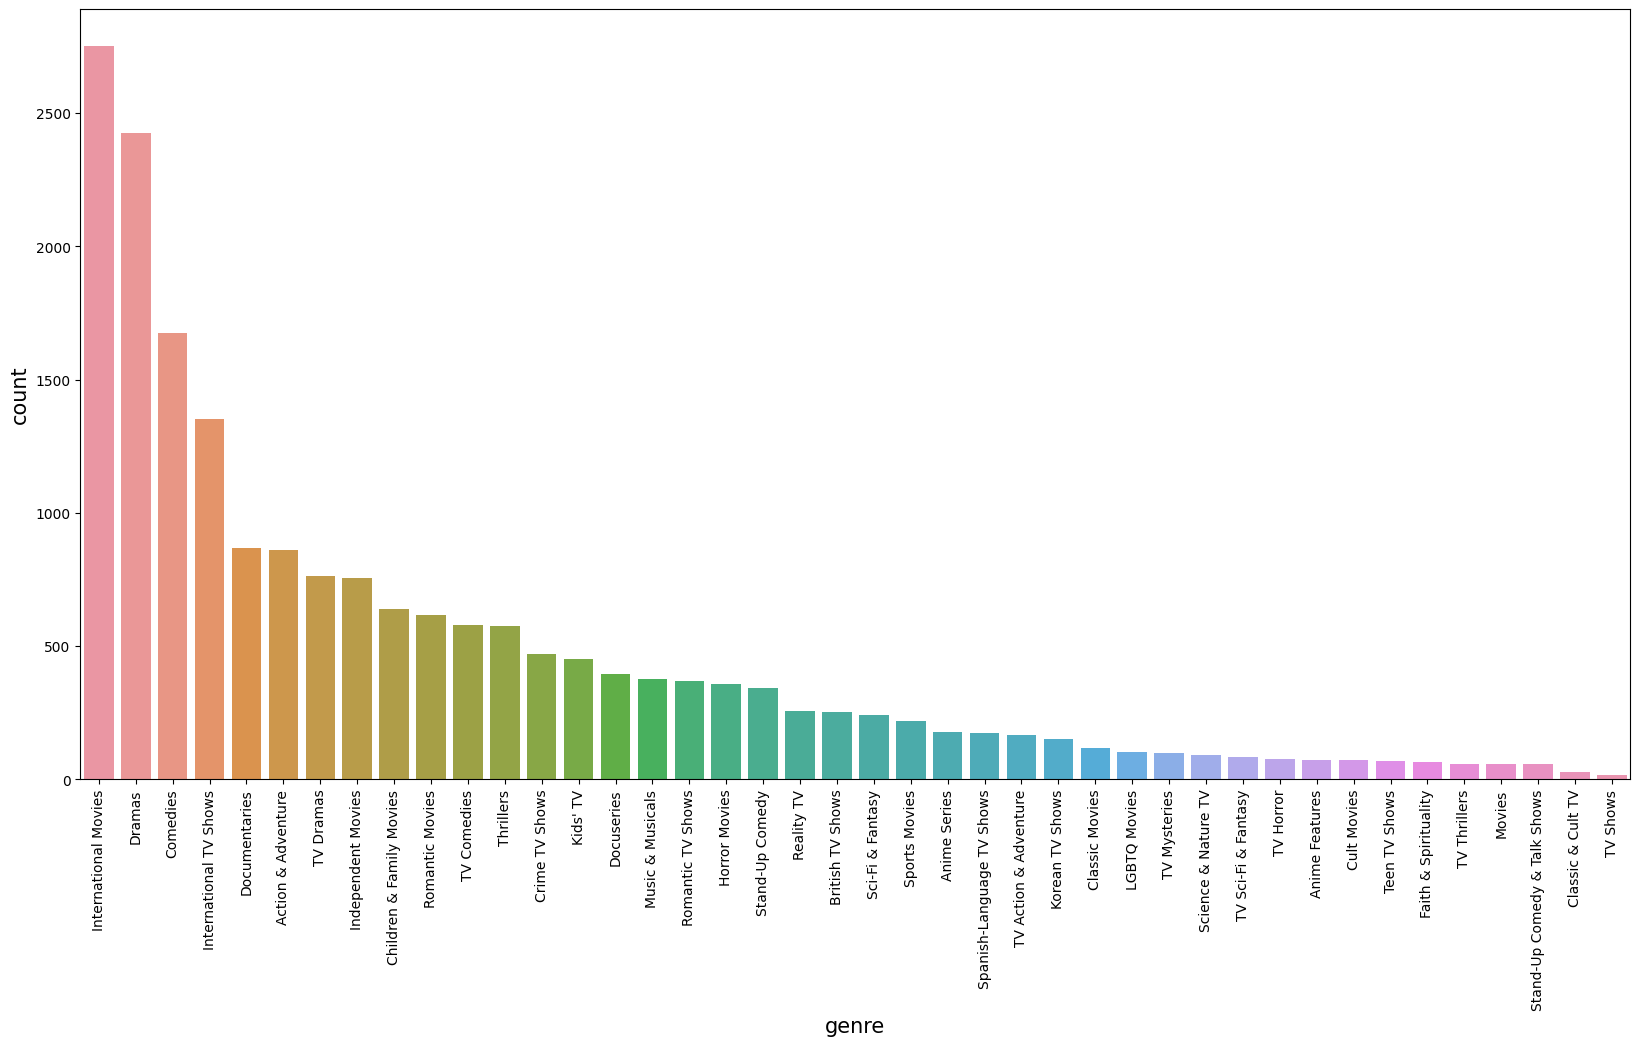

In [ ]:
#represent the genre category on graph
gra=df4.groupby("genre")["title"].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=gra,x='genre',y='title')
plt.xticks(rotation=90)
plt.xlabel("genre",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()


**2. Comparison of tv shows vs. movies.**


**A. Find the number of movies produced in each country and pick the top 10
countries.**

In [ ]:
#Top 10 countries where most movie produced
top10movie=df4.loc[df4['type']=='Movie']
top10movie=top10movie.groupby(by="country")["title"].nunique().reset_index().sort_values(by="title",ascending=False).head(10)
top10movie

,country,title
114,United States,2751
43,India,962
112,United Kingdom,532
122,unknown country,440
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114


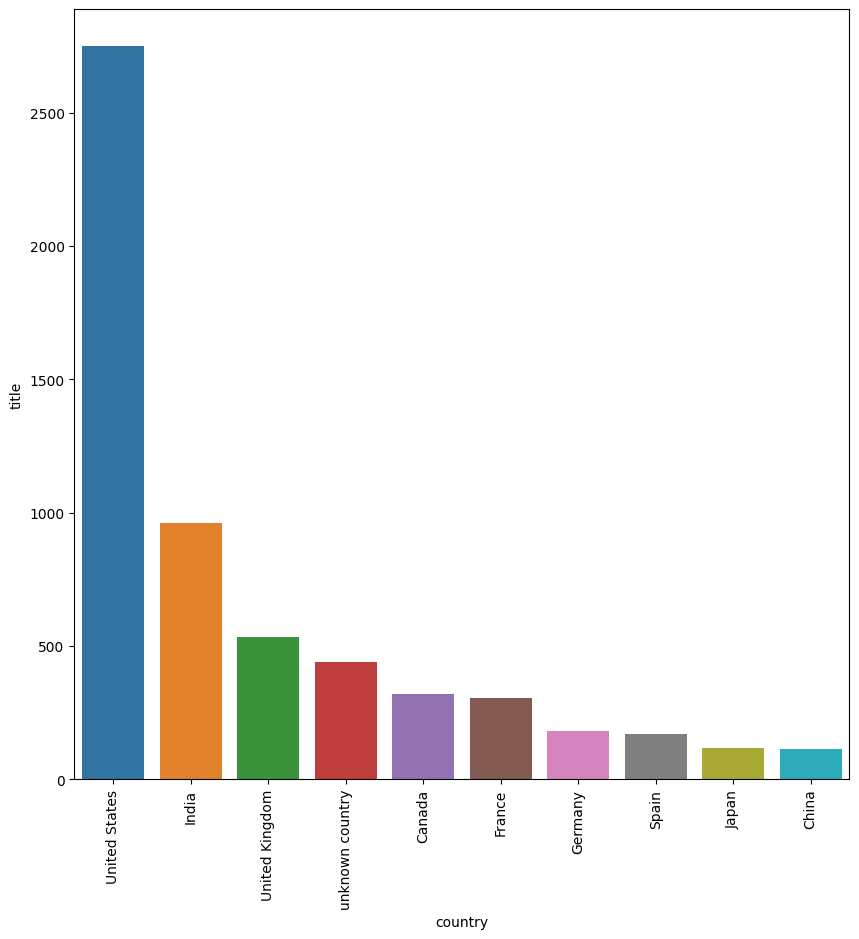

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =top10movie,x='country',y='title')
plt.xticks(rotation=90)
plt.show()

**b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.**

In [ ]:
#Top10 countries where most TV-Shows produced
top10tv=df4.loc[df4['type']=='TV Show']
top10tv=top10tv.groupby(by="country")["title"].nunique().reset_index().sort_values(by="title",ascending=False).head(10)
top10tv

,country,title
63,United States,938
66,unknown country,391
62,United Kingdom,272
30,Japan,199
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,66


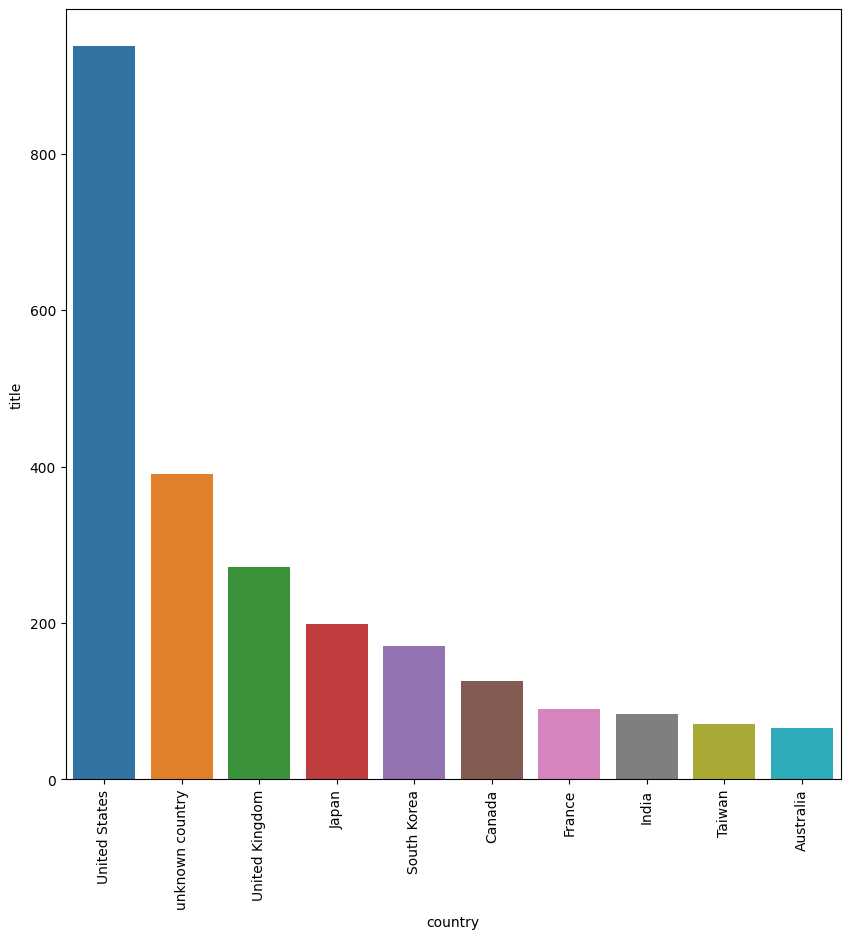

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =top10tv,x='country',y='title')
plt.xticks(rotation=90)
plt.show()

**3. What is the best time to launch a TV show?**

**a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and movies**

In [ ]:
#extract month and weeek from date_added column
date=pd.to_datetime(df["date_added"])
month=date.dt.month_name().reset_index()
month.rename(columns={"date_added":"month"},inplace=True)
week=date.dt.week.reset_index()
week.rename(columns={"date_added":"week"},inplace=True)
week=pd.concat([month,week],axis=1)
week.drop(columns="index",inplace=True)
df=pd.concat([df,week],axis=1)


<ipython-input-169-ea0663172e81>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week=date.dt.week.reset_index()


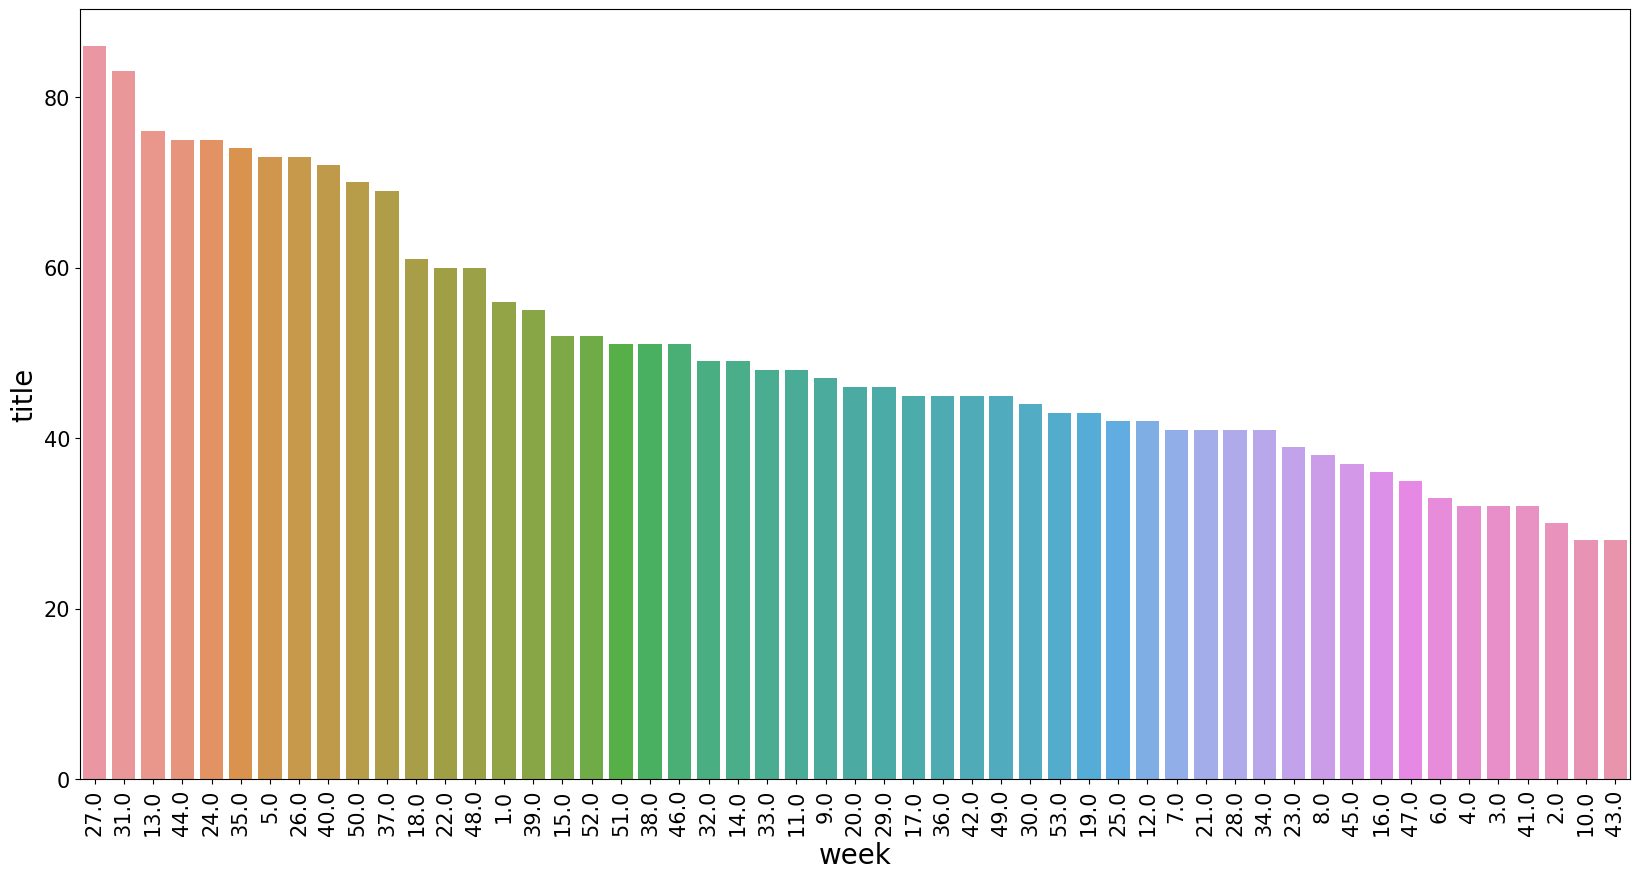

In [ ]:
#Tv show relase by week plot on graph
plt.figure(figsize=(20,10))
new=df.loc[(df["type"]=="TV Show")]
new=new.groupby(by="week")["title"].count().sort_values(ascending=False).reset_index()
sns.barplot(data=new,x="week",y="title",order=new.sort_values('title',ascending=False).week)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("title",fontsize=20)
plt.xlabel("week",fontsize=20)
plt.show()
#27 week is the best time to launch  TV Show

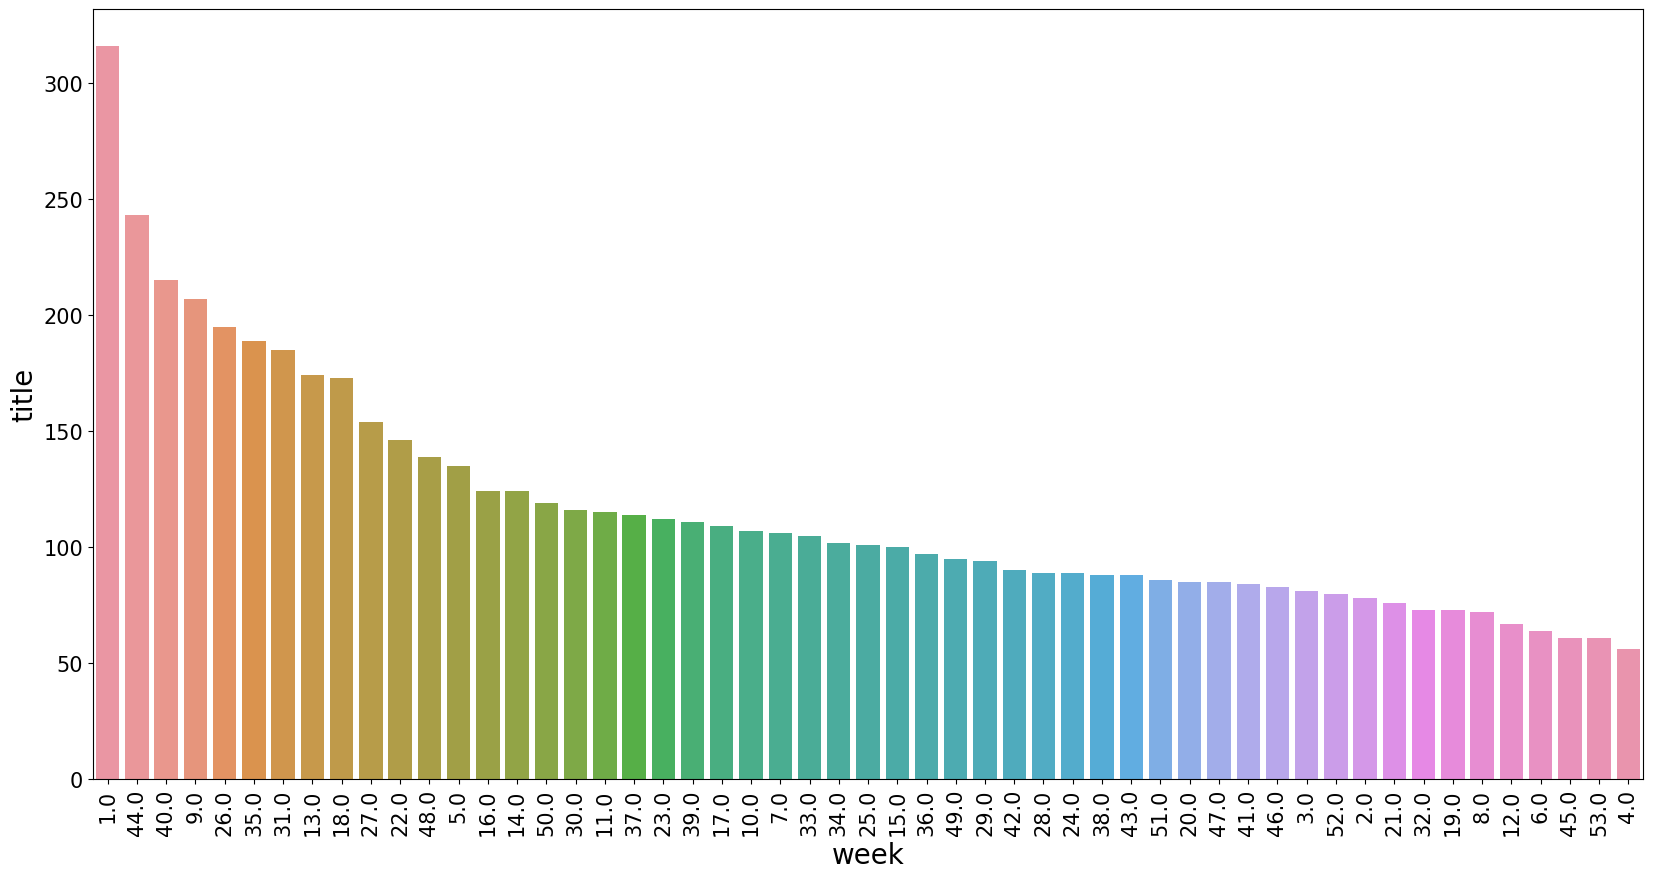

In [ ]:
#movie release by week plot on graph
plt.figure(figsize=(20,10))
new=df.loc[(df["type"]=="Movie")]
new=new.groupby(by="week")["title"].count().sort_values(ascending=False).reset_index()
sns.barplot(data=new,x="week",y="title",order=new.sort_values('title',ascending=False).week)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("title",fontsize=20)
plt.xlabel("week",fontsize=20)
plt.show()
# 1st week is the best time to launch  Movie

**b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-Shows and Movies**

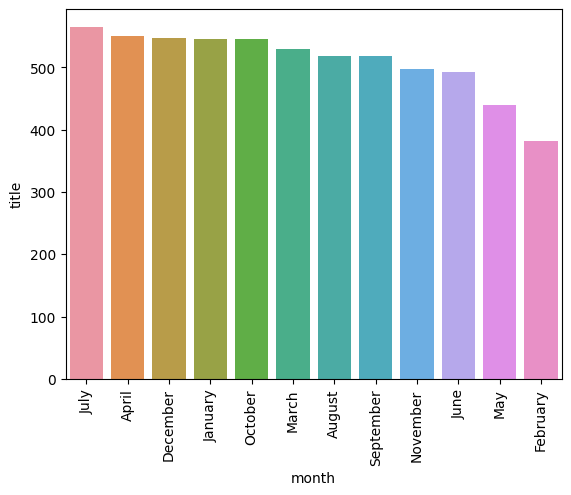

In [ ]:
# movie release by month plot on graph
new=df.loc[(df["type"]=="Movie")]
new=new.groupby(by="month")["title"].count().sort_values(ascending=False).reset_index()
sns.barplot(data=new,x="month",y="title")
plt.xticks(rotation=90)
plt.show()
#July is the best time to launch Movie in the month of july for Movie

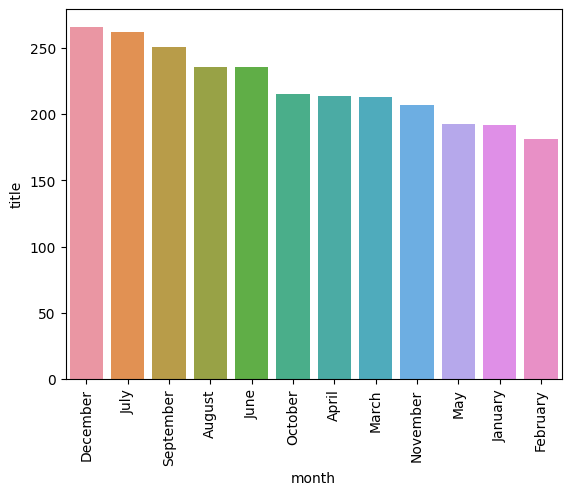

In [ ]:
#Tv show release by month plot on graph
new=df.loc[(df["type"]=="TV Show")]
new=new.groupby(by="month")["title"].count().sort_values(ascending=False).reset_index()
sns.barplot(data=new,x="month",y="title")
plt.xticks(rotation=90)
plt.show()
#December is the best time to launch TV Show in the month of july for TV show

**4. Analysis of actors/directors of different types of shows/movies.**

**a. Identify the top 10 actor who have appeared in most movies or TV shows.**

<Axes: xlabel='cast', ylabel='title'>

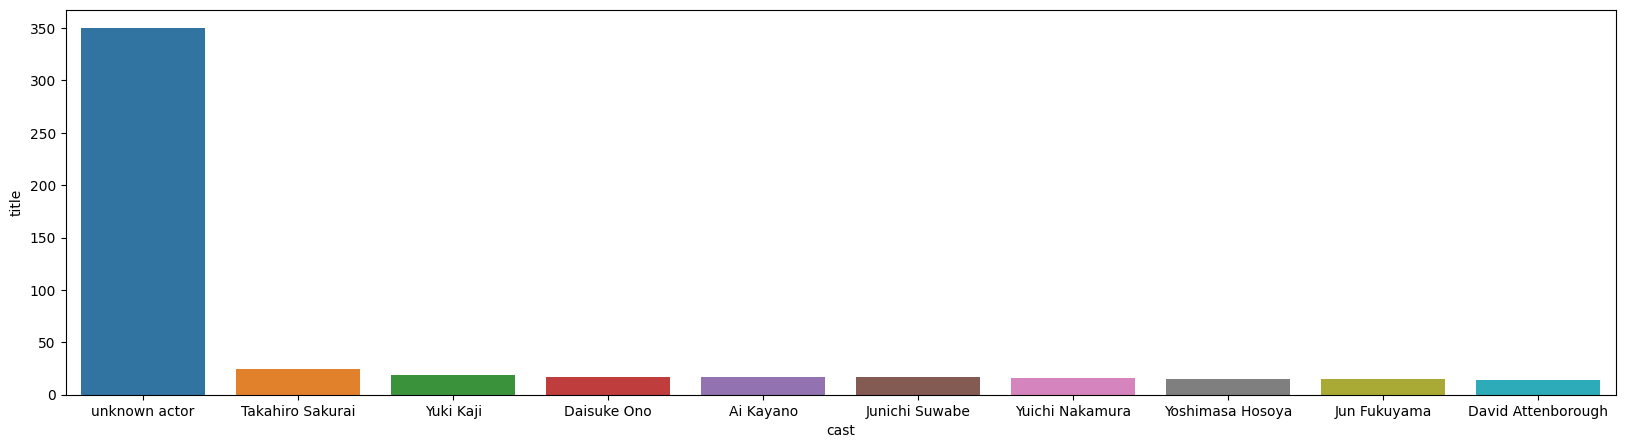

In [ ]:
#Top 10 Actor for TV shows
plt.figure(figsize=(20,5))
act=df4.loc[df4["type"]=='TV Show']
act=act.groupby(by=["cast"])["title"].nunique().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=act,x="cast",y="title")

<Axes: xlabel='cast', ylabel='title'>

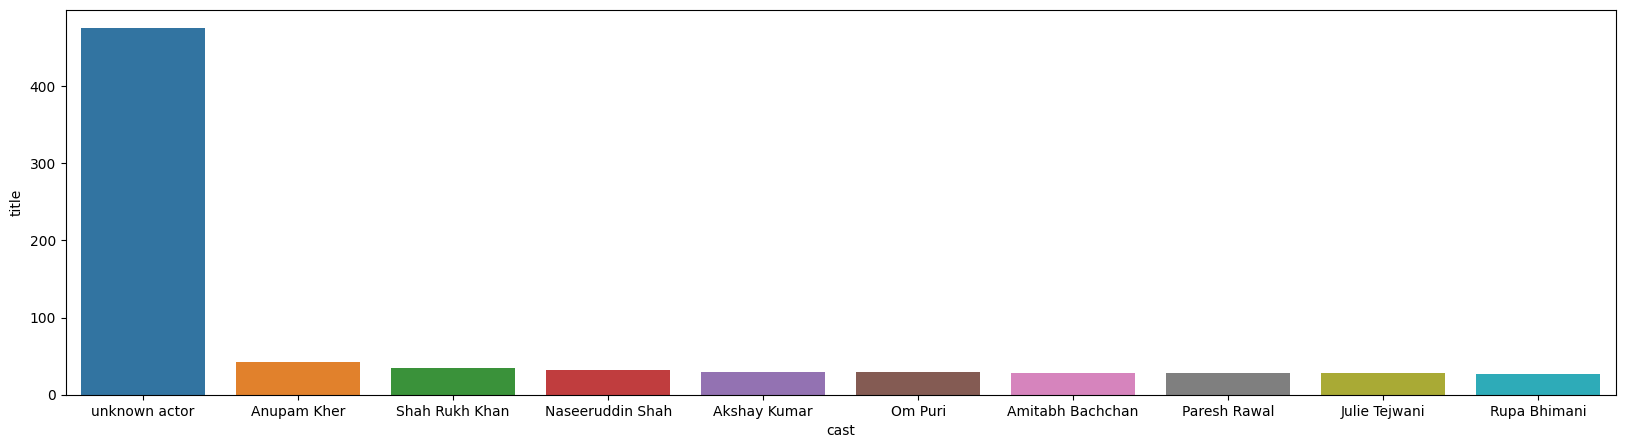

In [ ]:
#Top 10 Actor for Movie
plt.figure(figsize=(20,5))
act=df4.loc[df4["type"]=='Movie']
act=act.groupby(by=["cast"])["title"].nunique().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=act,x="cast",y="title")

**b. Identify the top 10 directors who have appeared in most movies or TV shows**

<Axes: xlabel='director', ylabel='title'>

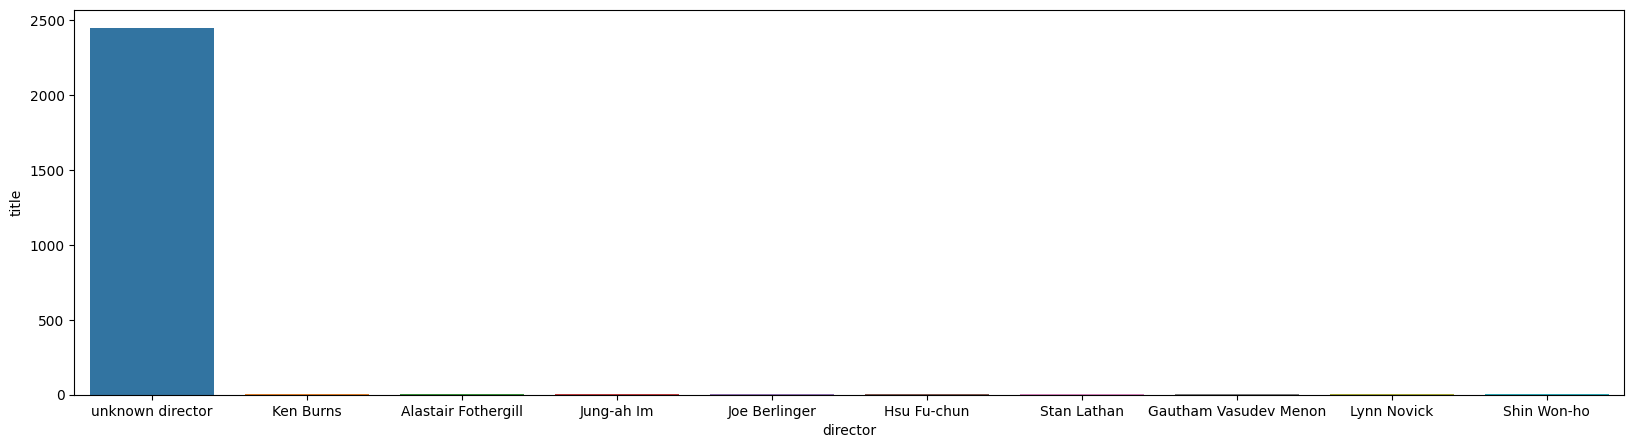

In [ ]:
#Top 10 director for TV Shows
plt.figure(figsize=(20,5))
dir=df4.loc[df4["type"]=='TV Show']
dir=dir.groupby(by=["director"])["title"].nunique().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=dir,x="director",y="title")

<Axes: xlabel='director', ylabel='title'>

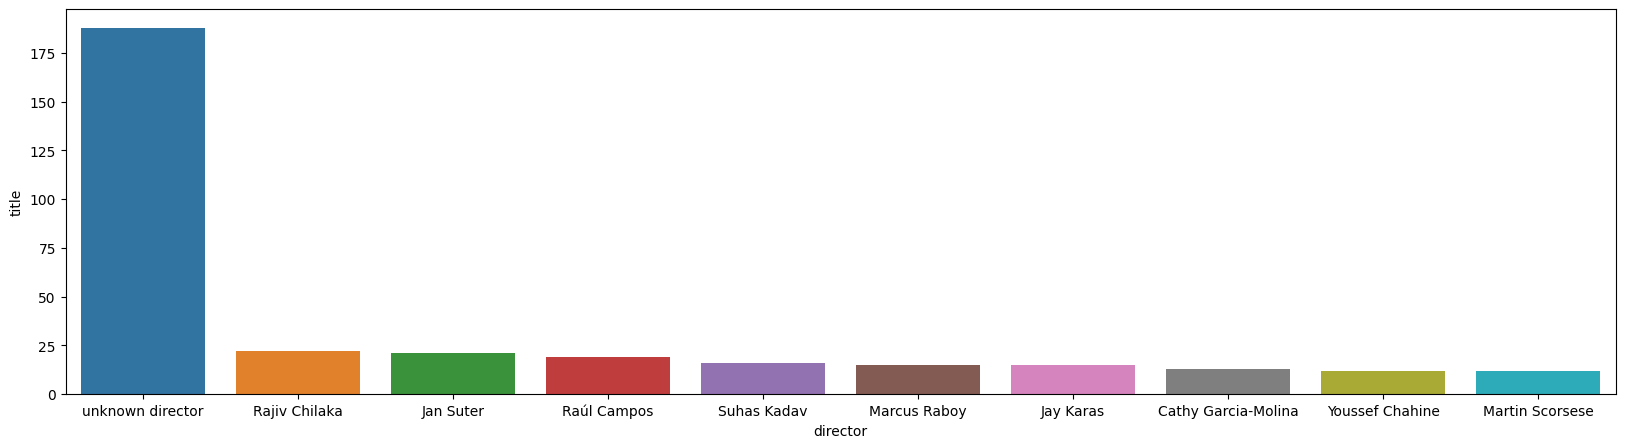

In [ ]:
#Top 10 director for Movies
plt.figure(figsize=(20,5))
dir=df4.loc[df4["type"]=='Movie']
dir=dir.groupby(by=["director"])["title"].nunique().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=dir,x="director",y="title")



**5. Which genre movies are more popular or produced more**

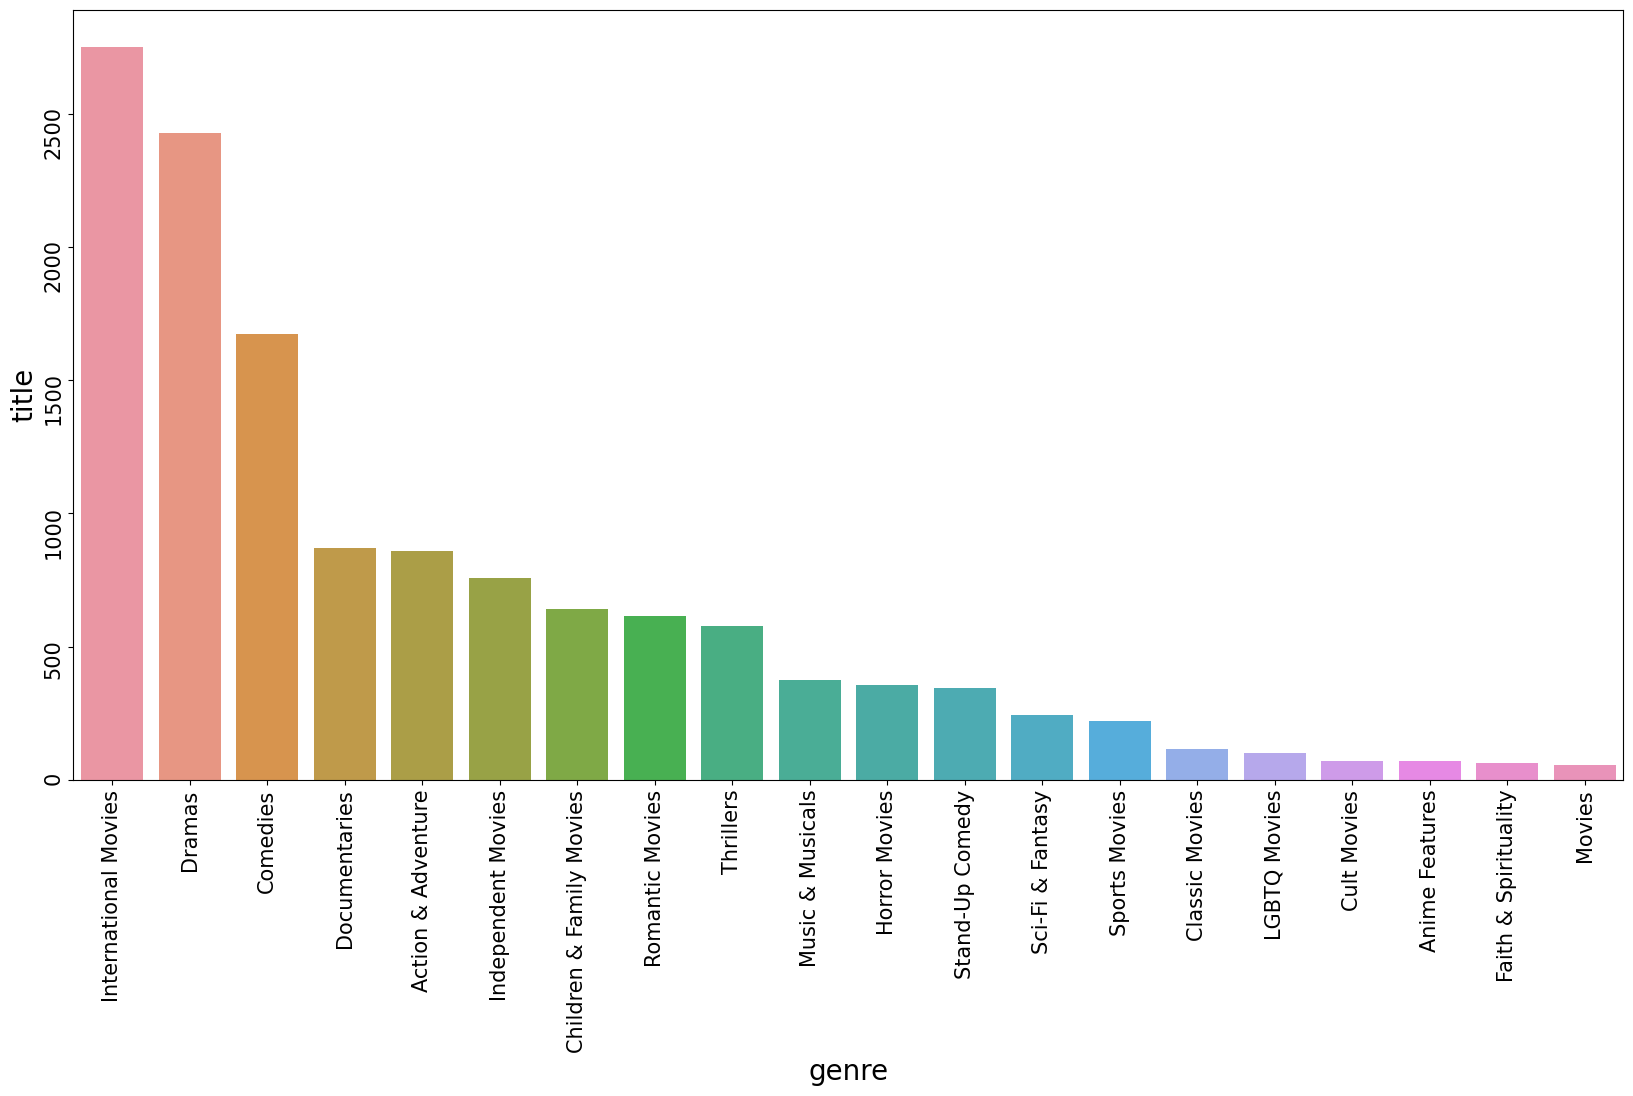

In [ ]:
# genre for movie which is most demaning and produced more plot on graph
fil=df4.loc[df4['type']=='Movie']
gen=fil.groupby(by="genre")["title"].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=gen,x="genre",y="title")
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("genre",fontsize=20)
plt.yticks(rotation=90,fontsize=15)
plt.ylabel("title",fontsize=20)
plt.show()

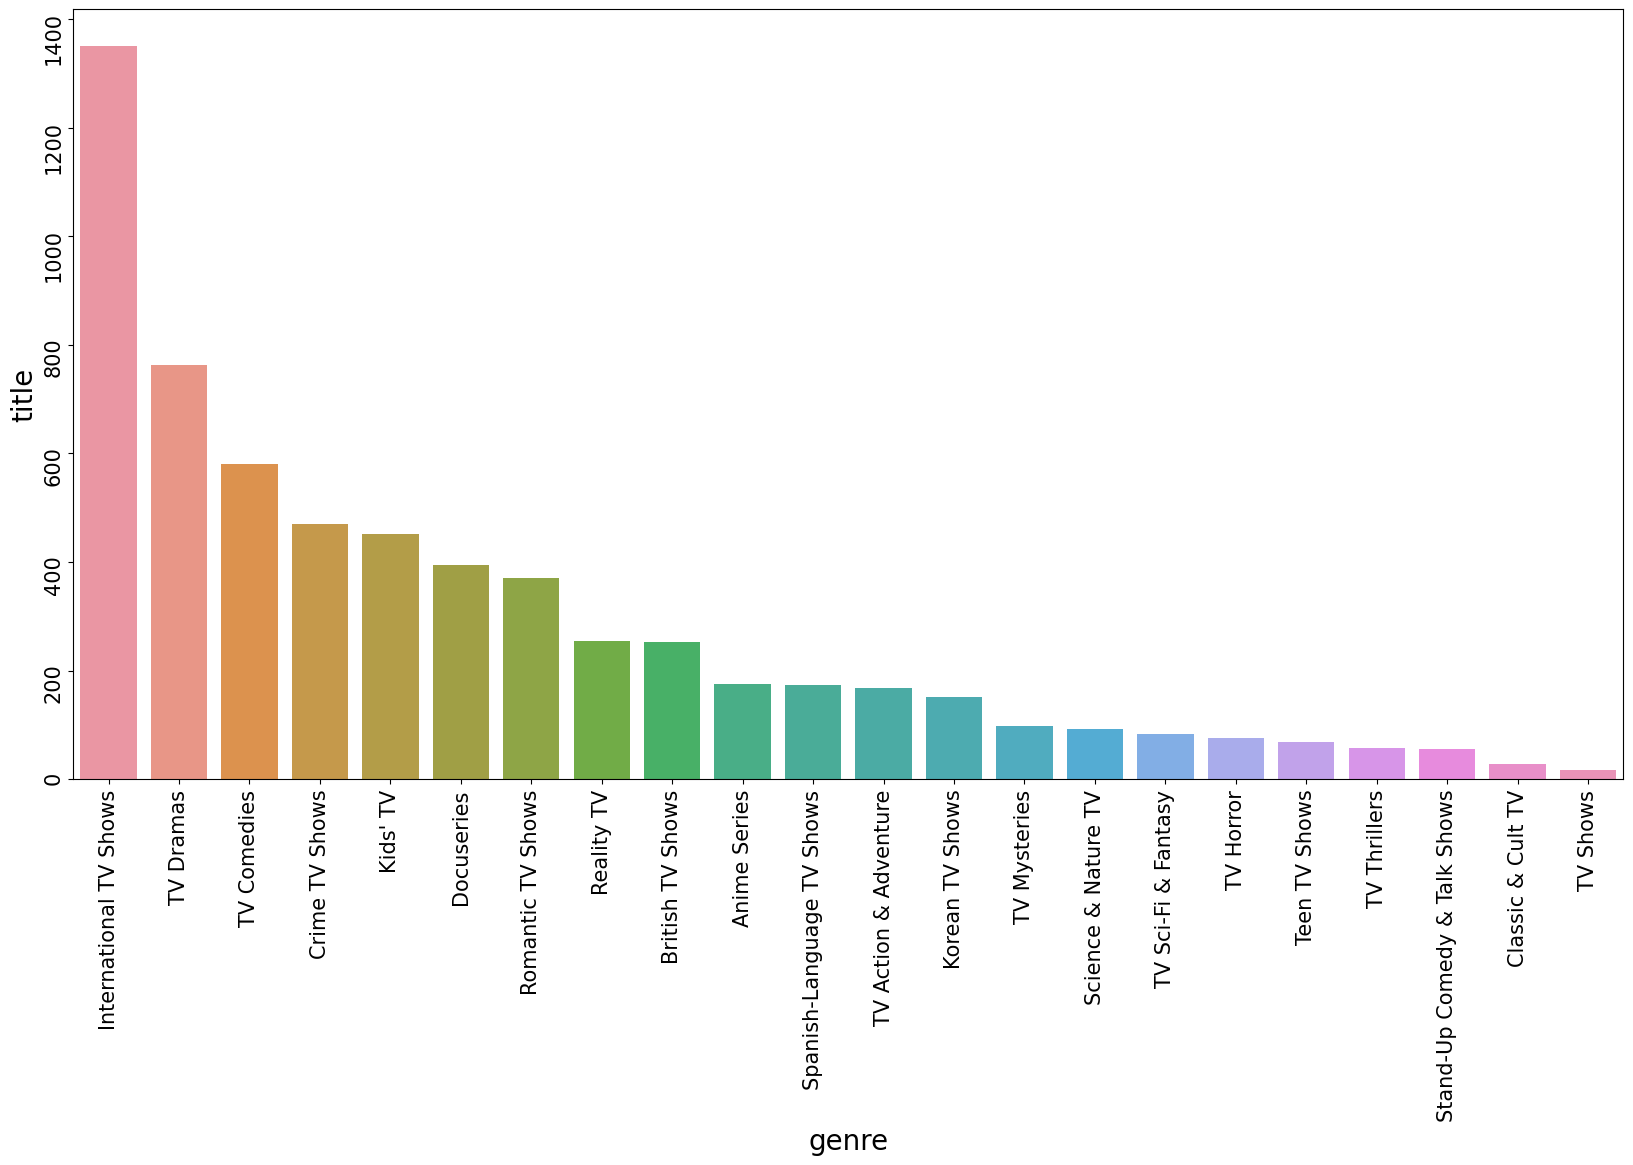

In [ ]:
# genre for Tv show  type  which is most demaning and produced more plot on graph
fil=df4.loc[df4['type']=='TV Show']
gen=fil.groupby(by="genre")["title"].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=gen,x="genre",y="title")
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("genre",fontsize=20)
plt.yticks(rotation=90,fontsize=15)
plt.ylabel("title",fontsize=20)
plt.show()

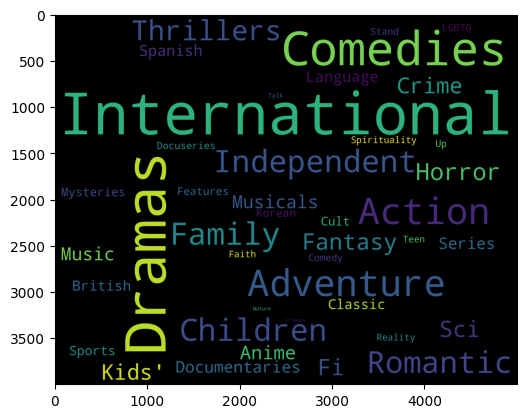

In [ ]:
# generate text  using wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join (i for i in df4.genre)
wordcloud= WordCloud(width=5000,height=4000,stopwords=['TV','Shows','Movies'],background_color='black',collocations=False).generate(text)
plt.imshow(wordcloud)

**6. Find After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)**

In [ ]:
#movie added to netflix in days
type=df.loc[(df["type"]=="Movie") & (df["release_year"]>=2008)]
diff=pd.to_datetime(type["date_added"])
new=diff.dt.year-type["release_year"]
new=new*365
new=new.reset_index()
new[0]+=diff.dt.month*30
new.drop(columns="index",inplace=True)
print("days",new.mode())


days        0
0  300.0


#Hence After 300 Days of release  movie or TV Shows added to netflix  

In [ ]:
new=pd.to_datetime(df4["date_added"]).dt.year.reset_index()
sns.boxplot(data=new,x="date_added")

**Recommendation**



1.  Movies are more Popular so more movies upload to netflix is beneficial  
2.   comedies and dramas type movie and tv shows are demanding so upload this type of movie and tv shows are good
3. 75-120 mintues movie is acceptable by audience so it's good to keep in range between this
4. 1 season or 2 season  for tv show is  good to upload more than that it's unusual
5. target audience is Adult in USA and UK and kids in India
6. Holiday season December , january, July is best time to release the content on netflix



**Insights**
1. Most uploaded number of season for TV Show is 1 season  
2. in genre category most uploaded dramas and comedies
3. there is unknown director and actor are more than others
4. 27 week for TV show and 1 week for movie are the best for uploading
5. July is best month  for Movie and december  is best month  for TV show to upload
6. movie are more uploaded comapare to TV Show
7. most movie and TV show added to netflix in last 5 year
8. most movies and tv shows are made for adults in USA and U.K
9. most of content for kids in india and adult for USA uK



